## **DATA PREPARATION**

In [1]:
# Library
#Fund. Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Multicolineary checking
import dython as dy
from dython.nominal import associations
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

#Modelling and Evaluation
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score

# Feature Selection
from sklearn.feature_selection import SelectPercentile

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_hotel_booking_demand.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


### Attribute Information

| Attribute | Data Type | Description |
| --- | --- | --- |
| country | Text | Country of origin |
| market_segment | Text | Market segment designation, typically influences the price sensitivity |
| previous_cancellations  | Integer | Number of previous cancellations prior to current booking |
| booking_changes | Integer | Number of changes made to the booking since entering the hotel management system |
| deposit_type | Text | Type of deposit made for the reservation |
| days_in_waiting_list | Integer | Number of days booking was in the waiting list until it was confirmed |
| customer_type | Text | Type of booking |
| reserved_room_type  | Integer | Code of room type reserved |
| required_car_parking_spaces | Integer | Number of car parking spaces requested |
| total_of_special_requests | Integer | Number of special requests made by the customer |
| is_canceled | Integer | Value indicating if the booking was canceled (1) or not (0) |

In [4]:
display(df.describe(), df.describe(include='object'))

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


In [5]:
display(df.head(), df.tail())

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
83572,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1


### **Missing Values**

Kolom `country` berisi data kategorikal, data missing value pada kolom ini tidak dihapus tapi diisi sengan konstanta other karena kita tidak ingin kehilangan data atau informasi, baris yang memiliki missing value pada kolom `country` tidak dihapus tapi diisi sengan konstanta 'other'. Juga terdapat kemungkinan negara-nya tidak atau belum teridentifikasi diluar 162 nilai uniknya (jumlah negara di dunia saat ini terdapat 195).

In [6]:
# Mengisi Missing Value dengan metode KNNimputer konstanta

df['country'].fillna('Other',inplace = True)

In [7]:
df[df['country']=='Other']

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
814,Other,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1166,Other,Direct,2,0,No Deposit,0,Transient,E,0,3,1
1304,Other,Direct,0,1,No Deposit,0,Transient,D,0,1,0
1661,Other,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
2182,Other,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
82466,Other,Offline TA/TO,0,0,No Deposit,0,Transient,A,0,0,0
83084,Other,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
83106,Other,Direct,0,0,No Deposit,0,Transient,A,0,2,0
83353,Other,Direct,0,0,No Deposit,0,Transient,A,0,0,0


In [8]:
# Exploratory Data Analysis (EDA)

#skim the data to see if there are any missing values
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    '?_value': [len(df[col][df[col] == '?']) for col in df.columns],
    '?_value(%)': [len(df[col][df[col] == '?']) / len(df) * 100 for col in df.columns],
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(2)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,?_value,?_value(%),sample_unique
0,country,object,0.0,0.0,0.00,73371,163,0,0.0,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, B..."
1,market_segment,object,0.0,0.0,0.00,73371,8,0,0.0,"[Offline TA/TO, Online TA, Direct, Groups, Cor..."
2,previous_cancellations,int64,0.0,0.0,94.60,73371,15,0,0.0,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19,..."
3,booking_changes,int64,0.0,0.0,84.80,73371,19,0,0.0,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12,..."
4,deposit_type,object,0.0,0.0,0.00,73371,3,0,0.0,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,int64,0.0,0.0,96.91,73371,115,0,0.0,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31..."
6,customer_type,object,0.0,0.0,0.00,73371,4,0,0.0,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,object,0.0,0.0,0.00,73371,10,0,0.0,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,int64,0.0,0.0,93.75,73371,5,0,0.0,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,int64,0.0,0.0,58.86,73371,6,0,0.0,"[0, 2, 1, 3, 4, 5]"


### **Duplicated Data**

In [9]:
df.duplicated().sum(), df.duplicated().sum() / len(df)

(73371, 0.8779270817129934)

Terdapat 73.371 data duplikat dalam data, namun duplikat data ini tidak memiliki informasi unik(nama/nomor pelanggan atau tanggal) yang dapat membedakan satu data dengan data lainnya sehingga kita tidak memberikan perlakuan khusus untuk data duplikat ini.

### **Outlier Handling**

In [10]:
display(df.describe(), df.describe(include='object'))

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83573,83573,83573,83573,83573
unique,163,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


In [11]:
# Filter hanya kolom numerik
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [12]:
# Menentukan jumlah kolom dan baris untuk tata letak grid
num_columns = len(numeric_columns)
num_columns

6

In [13]:
num_rows = int((num_columns / 3) + (1 if num_columns % 3 > 0 else 0))
num_rows

2

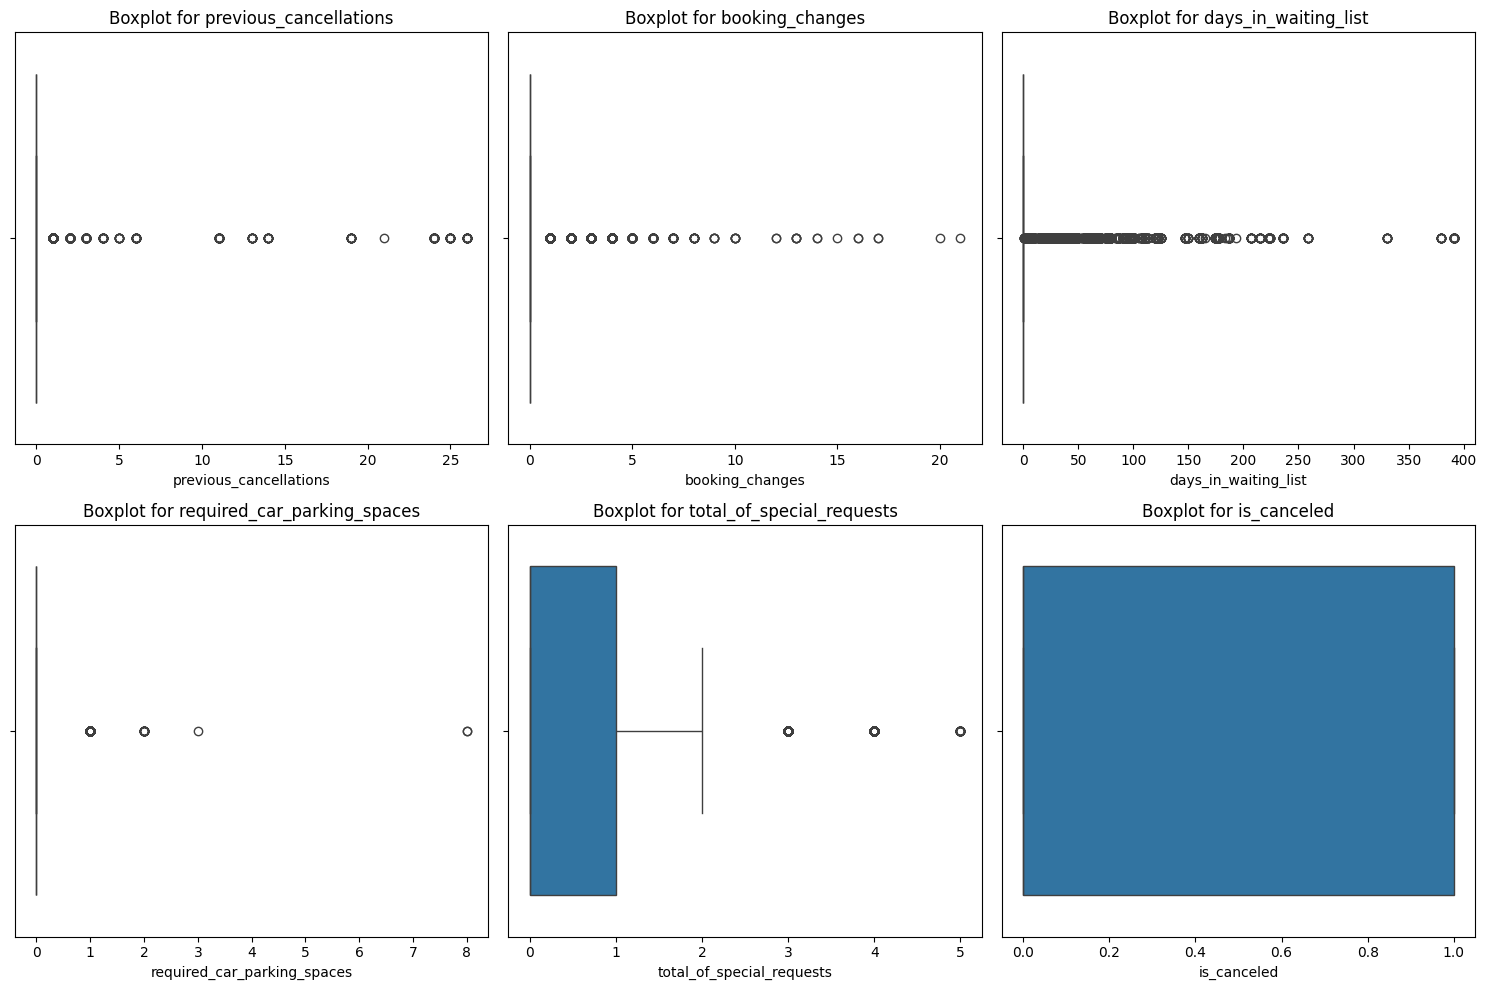

In [14]:
def visualize_boxplots(df):
    # Filter hanya kolom numerik
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Menentukan jumlah kolom dan baris untuk tata letak grid
    num_columns = len(numeric_columns)
    num_rows = int((num_columns / 3) + (1 if num_columns % 3 > 0 else 0))

    # Menentukan ukuran gambar berdasarkan jumlah kolom
    plt.figure(figsize=(15, 5 * num_rows))

    # Menampilkan boxplot satu per satu untuk kolom numerik
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, 3, i)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')

    # Menyesuaikan tata letak
    plt.tight_layout()
    plt.show()

# Menampilkan boxplot satu per satu pada kolom numerik
visualize_boxplots(df)

In [15]:
df[df['booking_changes']>20].head() # 1 data

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
31274,PRT,Corporate,0,21,No Deposit,0,Transient-Party,A,0,0,0


In [16]:
df[df['days_in_waiting_list']>365].head() # 43 Datas

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
5970,PRT,Groups,0,0,Non Refund,391,Transient,A,0,0,1
6788,PRT,Groups,0,0,Non Refund,391,Transient,A,0,0,1
7227,PRT,Groups,0,0,Non Refund,391,Transient,A,0,0,1
8063,FRA,Groups,0,1,No Deposit,379,Transient-Party,A,0,1,0
11062,PRT,Groups,0,0,No Deposit,379,Transient-Party,A,0,0,1


In [17]:
df[df['required_car_parking_spaces']>3].head() # 2 Datas

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
21979,AUT,Direct,0,1,No Deposit,122,Transient-Party,E,8,0,0
35802,AUT,Direct,0,1,No Deposit,0,Transient-Party,E,8,1,0


In [18]:
# Mendefinisikan limitasi model dari outlier handling
df2 = df.copy()

df.drop(df[df['booking_changes']>20].index, inplace=True)
df.drop(df[df['days_in_waiting_list']>365].index, inplace=True)
df.drop(df[df['required_car_parking_spaces']>3].index, inplace=True)

Model machine learning yang akan dibuat memiliki batasan konteks `booking_changes` <= 20, `days_in_waiting_list` <= 365, dan `required_car_parking_spaces` <= 3

In [19]:
# # Menentukan path (lokasi) dan nama file CSV yang diinginkan
# file_csv = 'E:/Penyimpanan Utama (C)/Purwadhika Coding School/Orientasi/Modul 3/Github Caps M3/data_hotel_booking_demand_cln.csv'
# file_csv2 = 'E:/Penyimpanan Utama (C)/Purwadhika Coding School/Orientasi/Modul 3/Github Caps M3/data_hotel_booking_demand_cln2.csv'
# file_csv3 = 'E:/Penyimpanan Utama (C)/Purwadhika Coding School/Orientasi/Modul 3/Github Caps M3/data_hotel_booking_demand_cln3.csv'

# # Menyimpan DataFrame ke dalam file CSV
# df.to_csv(file_csv, index=False)
# df2.to_csv(file_csv2, index=False)
# df3.to_csv(file_csv3, index=False)

## **FEATURE ENGINEERING**

In [20]:
# Exploratory Data Analysis (EDA)

# Understanding the data from the amount of unique values in each column
pd.set_option('display.max_colwidth', 100000) # unique datas in every columns

unique_list = []
for col in df.columns :
    unique_list.append( [col, df[col].nunique(), df[col].unique()])

unique_table = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=unique_list)
unique_table

,Column Name,Number of Unique,Unique Sample
0,country,163,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, BEL, JPN, DEU, ITA, CHE, GBR, AGO, SRB, COL, CHN, SWE, AUT, CIV, CZE, POL, USA, SGP, RUS, ROU, DNK, IND, MAR, PHL, ARG, ISL, ZAF, LBN, MOZ, TUR, BGD, MEX, CAF, NOR, FIN, UKR, EGY, ISR, Other, KOR, AZE, HUN, AUS, EST, CHL, SVN, PRY, ABW, ALB, LTU, ARE, HRV, SAU, NZL, LVA, ATA, KAZ, DZA, TWN, CRI, BIH, BGR, IRQ, OMN, VEN, IDN, GEO, MLT, IRN, BLR, URY, LBY, TUN, BEN, MYS, MWI, GRC, CYP, CPV, HKG, PRI, MKD, MUS, IMN, PAN, NGA, GLP, KHM, PER, QAT, SEN, MAC, ...]"
1,market_segment,8,"[Offline TA/TO, Online TA, Direct, Groups, Corporate, Complementary, Aviation, Undefined]"
2,previous_cancellations,15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19, 5, 21]"
3,booking_changes,18,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12, 14, 16, 20, 15]"
4,deposit_type,3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,113,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31, 122, 34, 57, 259, 50, 17, 32, 43, 75, 69, 44, 22, 113, 58, 38, 65, 48, 236, 176, 25, 108, 91, 19, 160, 68, 28, 63, 35, 42, 59, 24, 8, 183, 187, 21, 111, 56, 98, 101, 15, 16, 47, 93, 45, 14, 70, 10, 49, 178, 99, 60, 40, 85, 223, 6, 33, 20, 1, 41, 147, 55, 80, 150, 61, 330, 174, 107, 96, 18, 62, 13, 30, 120, 27, 207, 71, 2, 76, 125, 5, 9, 224, 53, 83, 84, 12, 73, 100, ...]"
6,customer_type,4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,4,"[0, 1, 2, 3]"
9,total_of_special_requests,6,"[0, 2, 1, 3, 4, 5]"


In [21]:
df_prep = df.copy()    # menyimpan hasil encoding
df_prepa = df.copy()
df_dummy = df.copy()   # untuk menyimpan sementara

### **Binning, Encoding, dan Scaling**

preprocess scheme:
1. Binning : country, market_segment, days_in_waiting_list
1. One hot encoding : country, market_segment, deposit_type, customer_type, required_car_parking_spaces
1. Ordinal encoding : days_in_waiting_list
1. Binary encoding : reserved_room_type
1. Robust scaler : previous_cancellations, booking_changes, total_of_special_requests

### **`country`**

In [22]:
# Membuat pemetaan antara kode negara dan benua
continent_mapping = {
'IRL': 'Europe','FRA': 'Europe','PRT': 'Europe','NLD': 'Europe','ESP': 'Europe','UMI': 'North America','CN': 'Asia',
'LUX': 'Europe','BRA': 'South America','BEL': 'Europe','JPN': 'Asia','DEU': 'Europe','ITA': 'Europe','CHE': 'Europe',
'GBR': 'Europe','AGO': 'Africa','SRB': 'Europe','COL': 'South America','CHN': 'Asia','SWE': 'Europe','AUT': 'Europe',
'CIV': 'Africa','CZE': 'Europe','POL': 'Europe','USA': 'North America','SGP': 'Asia','RUS': 'Europe','ROU': 'Europe',
'DNK': 'Europe','IND': 'Asia','MAR': 'Africa','PHL': 'Asia','ARG': 'South America','ISL': 'Europe','ZAF': 'Africa',
'LBN': 'Asia','MOZ': 'Africa','TUR': 'Asia','BGD': 'Asia','MEX': 'North America','CAF': 'Africa','NOR': 'Europe','FIN': 'Europe',
'UKR': 'Europe','EGY': 'Africa','ISR': 'Asia','Other': 'Unknown','KOR': 'Asia','AZE': 'Asia','HUN': 'Europe','AUS': 'Oceania',
'EST': 'Europe','CHL': 'South America','SVN': 'Europe','PRY': 'South America','ABW': 'North America','ALB': 'Europe','LTU': 'Europe',
'ARE': 'Asia','HRV': 'Europe','SAU': 'Asia','NZL': 'Oceania','LVA': 'Europe','ATA': 'Antarctica','KAZ': 'Asia','DZA': 'Africa',
'TWN': 'Asia','CRI': 'North America','BIH': 'Europe','BGR': 'Europe','IRQ': 'Asia','OMN': 'Asia','VEN': 'South America','IDN': 'Asia',
'GEO': 'Asia','MLT': 'Europe','IRN': 'Asia','BLR': 'Europe','URY': 'South America','LBY': 'Africa','TUN': 'Africa','BEN': 'Africa',
'MYS': 'Asia','MWI': 'Africa','GRC': 'Europe','CYP': 'Asia','CPV': 'Africa','HKG': 'Asia','PRI': 'North America','MKD': 'Europe',
'MUS': 'Africa','IMN': 'Europe','PAN': 'North America','NGA': 'Africa','GLP': 'North America','KHM': 'Asia','PER': 'South America','QAT': 'Asia',
'SEN': 'Africa','MAC': 'Asia','SVK': 'Europe','BHR': 'Asia','ECU': 'South America','SYC': 'Africa','BOL': 'South America','TJK': 'Asia',
'LCA': 'North America','MDV': 'Asia','SYR': 'Asia','ZMB': 'Africa','LIE': 'Europe','THA': 'Asia','MNE': 'Europe','BRB': 'North America',
'CMR': 'Africa','JEY': 'Europe','GTM': 'North America','LKA': 'Asia','JOR': 'Asia','TZA': 'Africa','AND': 'Europe','ARM': 'Asia','GIB': 'Europe',
'VNM': 'Asia','PAK': 'Asia','JAM': 'North America','DOM': 'North America','KWT': 'Asia','LAO': 'Asia','RWA': 'Africa','FRO': 'Europe',
'GAB': 'Africa','ETH': 'Africa','CUB': 'North America','COM': 'Africa','GNB': 'Africa','GGY': 'Europe','NIC': 'North America','TGO': 'Africa',
'TMP': 'Asia','CYM': 'North America','GHA': 'Africa','SLE': 'Africa','BWA': 'Africa','NCL': 'Oceania','UZB': 'Asia','SUR': 'South America',
'SDN': 'Africa','PLW': 'Oceania','MLI': 'Africa','MMR': 'Asia','BFA': 'Africa','SLV': 'North America','BDI': 'Africa','ZWE': 'Africa',
'UGA': 'Africa','DMA': 'North America','VGB': 'North America','KIR': 'Oceania','KEN': 'Africa','MYT': 'Africa','KNA': 'North America',
'AIA': 'North America'
}

# Tambahkan kolom 'benua' berdasarkan pemetaan
df_prep['continent'] = df_prep['country'].map(continent_mapping)
column = ['country','market_segment','previous_cancellations','booking_changes','deposit_type','days_in_waiting_list',
                           'customer_type','reserved_room_type','required_car_parking_spaces','total_of_special_requests','is_canceled']
df_prep = df_prep.drop(column, axis=1)


(pd.crosstab(index=df_prep['continent'], columns='Number of Bookings(%)', normalize=True)*100).round(2).sort_values('Number of Bookings(%)', ascending=False).head(10)

col_0,Number of Bookings(%)
continent,
Europe,90.33
Asia,3.73
South America,2.26
North America,1.91
Africa,0.92
Oceania,0.42
Unknown,0.42
Antarctica,0.00


In [23]:
# Fungsi untuk mengubah kode negara menjadi benua
def count_code(code):
    return continent_mapping.get(code, 'Unknown')

# Menerapkan fungsi ke kolom 'negara' menggunakan apply
df_prepa['country'] = df_prepa['country'].apply(count_code)
df_prepa = df_prepa.rename(columns={'country': 'continent'})

print(df_prepa['continent'].unique())
df_prepa.columns

['Europe' 'North America' 'Asia' 'South America' 'Africa' 'Unknown'
 'Oceania' 'Antarctica']


Index(['continent', 'market_segment', 'previous_cancellations',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'reserved_room_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_canceled'],
      dtype='object')

In [24]:
df_prepa['continent'].value_counts()

continent
Europe           75453
Asia              3117
South America     1891
North America     1594
Africa             767
Oceania            353
Unknown            351
Antarctica           1
Name: count, dtype: int64

Pengambilan informasi hanya kepada 2 kelas terbanyak yaitu Europe dan Asia untuk menghindari multicolinearity dan kompleksitas dari model yang akan dibuat

In [25]:
def segment(x):
    if x == 'Europe':
        return x
    elif x == 'Asia':
        return x
    elif x == 'South America':
        return x
    elif x == 'North America':
        return x
    else:
        return 'Others'

In [26]:
# Mengubah kontinen dengan persentase rendah menjadi 1 kategori 'Other' sehingga binning menjadi 4 kategori
df_prepa['continent'] = df_prep['continent'].apply(segment)
# df_prep = pd.get_dummies(df_prep, dtype = int, columns=['continent'])
# df_prepa.drop(columns=['country', 'market_segment','previous_cancellations','booking_changes','deposit_type','days_in_waiting_list',
#                        'customer_type','reserved_room_type','required_car_parking_spaces','total_of_special_requests',
#                        'is_canceled'], inplace=True)
df_prepa['continent'].unique()

array(['Europe', 'North America', 'Asia', 'South America', 'Others'],
      dtype=object)

### **`market_segment`**

In [27]:
(pd.crosstab(index=df['market_segment'], columns='Number of Bookings(%)', normalize=True)*100).round(2).sort_values('Number of Bookings(%)', ascending=False).head(10)

col_0,Number of Bookings(%)
market_segment,
Online TA,47.24
Offline TA/TO,20.38
Groups,16.38
Direct,10.65
Corporate,4.54
Complementary,0.61
Aviation,0.20
Undefined,0.00


Dari tabel diatas mayoritas pemesanan kamar hotel di pesan oleh customer melalui Online Travel Agent. Dikarenakan segment lain memiliki presentase yang kecil maka kita akan mengelompokan segment-segment tersebut ke dalam kategori 'Others'

In [28]:
def segment2(x):
    if x == 'Online TA':
        return x
    elif x == 'Offline TA/TO':
        return x
    if x == 'Groups':
        return x
    else:
        return 'Others'

In [29]:
df_prepa['market_segment'] = df_prepa['market_segment'].apply(segment2)
print(df_prepa['market_segment'].unique())
df_prepa.columns

['Offline TA/TO' 'Online TA' 'Others' 'Groups']


Index(['continent', 'market_segment', 'previous_cancellations',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'reserved_room_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_canceled'],
      dtype='object')

### **`deposit_type`, `customer_type`, `required_car_parking_spaces`**

1. Pada kolom `deposit_type` diambil informasi yang paling dominan (No Deposit)
1. Pada kolom `customer_type` diambil informasi 2 kelas yang paling dominan (transient dan Transient-Party)
1. Sedangkan kolom `required_car_parking_spaces` diambil informasi customer yang membutuhkan tempat parkir lebih dari 1

In [30]:
display(df_prepa['deposit_type'].value_counts(),df_prepa['customer_type'].value_counts(), df_prepa['required_car_parking_spaces'].value_counts())

deposit_type
No Deposit    73339
Non Refund    10078
Refundable      110
Name: count, dtype: int64

customer_type
Transient          62699
Transient-Party    17523
Contract            2882
Group                423
Name: count, dtype: int64

required_car_parking_spaces
0    78302
1     5202
2       22
3        1
Name: count, dtype: int64

In [31]:
# def segment3(x):
#     if x == 'No Deposit':
#         return x
#     else:
#         return 'Others'
    
def segment4(x):
    if x == 'Transient':
        return x
    elif x == 'Transient-Party':
        return x
    elif x == 'Contract':
        return x
    else:
        return 'Others'

def segment5(x):
    if x == 1:
        return x
    elif x == 2:
        return x
    elif x == 3:
        return x
    else:
        return 'Others'

In [32]:
# df_prepa['deposit_type'] = df_prepa['deposit_type'].apply(segment3)
df_prepa['customer_type'] = df_prepa['customer_type'].apply(segment4)
df_prepa['required_car_parking_spaces'] = df_prepa['required_car_parking_spaces'].apply(segment5)
display(df_prepa['deposit_type'].value_counts(),df_prepa['customer_type'].value_counts(), df_prepa['required_car_parking_spaces'].value_counts())

deposit_type
No Deposit    73339
Non Refund    10078
Refundable      110
Name: count, dtype: int64

customer_type
Transient          62699
Transient-Party    17523
Contract            2882
Others               423
Name: count, dtype: int64

required_car_parking_spaces
Others    78302
1          5202
2            22
3             1
Name: count, dtype: int64

### **`reserved_room_type`**

In [33]:
(pd.crosstab(index=df['reserved_room_type'], columns='Number of Bookings(%)', normalize=True)*100).round(2).sort_values('Number of Bookings(%)', ascending=False).head(10)

col_0,Number of Bookings(%)
reserved_room_type,
A,71.83
D,16.19
E,5.56
F,2.44
G,1.73
B,0.94
C,0.81
H,0.48
P,0.01


In [34]:
def segment6(x):
    if x == 'A':
        return x
    elif x == 'D':
        return x
    else:
        return 'Others'

In [35]:
df_prepa['reserved_room_type'] = df_prepa['reserved_room_type'].apply(segment6)
print(df_prepa['reserved_room_type'].value_counts())
df_prepa.columns

reserved_room_type
A         59997
D         13526
Others    10004
Name: count, dtype: int64


Index(['continent', 'market_segment', 'previous_cancellations',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'reserved_room_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_canceled'],
      dtype='object')

### `previous_cancellations`, `booking_changes`, `total_of_special_requests`, dan `days_in_waiting_list`

Keempat kolom ini data tipenya integer, terdapat outlier, dan memiliki kesamaan satuan sehingga dapat dilakukan scaling dengan methode robutscaler.

In [36]:
df_prepa2 = df_prepa.copy()

scaler = RobustScaler()                                                             # Inisialisasi RobustScaler

# Pilih kolom yang ingin di-scaling
cols = ['previous_cancellations','booking_changes','total_of_special_requests','days_in_waiting_list']   # Ganti dengan nama kolom sesuai dataset

df_prepa[cols] = scaler.fit_transform(df_prepa[cols])                                 # Lakukan scaling pada kolom tersebut

df_prepa.columns

Index(['continent', 'market_segment', 'previous_cancellations',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'reserved_room_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_canceled'],
      dtype='object')

## Encoding

In [37]:
# Perbedaan perlakukan pada kolom numerik, df_enc diberi perlakukan robust scaling sedangkan df_enc2 mempertahankan aslinya
df_enc = pd.get_dummies(df_prepa, columns=['continent','market_segment','deposit_type','customer_type','reserved_room_type','required_car_parking_spaces'], dtype=int)
df_enc2 = pd.get_dummies(df_prepa2, columns=['continent','market_segment','deposit_type','customer_type','reserved_room_type','required_car_parking_spaces'], dtype=int)
df_enc.columns

Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'total_of_special_requests', 'is_canceled', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Others',
       'continent_South America', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Others', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Contract', 'customer_type_Others',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'reserved_room_type_A', 'reserved_room_type_D',
       'reserved_room_type_Others', 'required_car_parking_spaces_1',
       'required_car_parking_spaces_2', 'required_car_parking_spaces_3',
       'required_car_parking_spaces_Others'],
      dtype='object')

### **Interpretasi Berdasarkan Domain Knowledge**

1. Market Segment : Secara garis besar pelanggan yang memesan secara online lebih nyaman untuk membatalkan dan memesan ulang daripada pelanggan yang langsung datang ke hotel atau melalui kantor travel agent.
1. Deposit Type : pemesanan yang dilakukan dimana deposit dapat dikembalikan jika pemesanan dibatalkan, biasanya memiliki kecenderungan yang lebih tinggi untuk membatalkan pemesanan daripada pemesanan yang dilakukan dengan persyaratan deposit tidak dikembalikan.
1. Customer Type : pelanggan yang melakukan pemesanan untuk grup akan memiliki kecenderungan yang jauh lebih rendah untuk membatalkan pemesanan mereka karena perencanaan perjalanan untuk pelanggan yang bepergian dalam grup harus lebih pasti daripada tur individu.
1. Room Type : pelanggan yang memesan kamar lebih murah seharusnya memiliki kecenderungan yang lebih tinggi untuk membatalkan karena pelanggan di level ini akan mencari harga serendah mungkin, jadi jika ada potongan harga untuk kamar lain, mereka akan membatalkan pemesanan sebelumnya dan akan memesan kamar dengan harga yang sudah di diskon oleh pihak hotel.

In [38]:
df_enc.columns

Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'total_of_special_requests', 'is_canceled', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Others',
       'continent_South America', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Others', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Contract', 'customer_type_Others',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'reserved_room_type_A', 'reserved_room_type_D',
       'reserved_room_type_Others', 'required_car_parking_spaces_1',
       'required_car_parking_spaces_2', 'required_car_parking_spaces_3',
       'required_car_parking_spaces_Others'],
      dtype='object')

In [39]:
# Menghapus fitur days_in_waiting_list
features_improve = ['market_segment', 'previous_cancellations','booking_changes', 'deposit_type','customer_type', 'reserved_room_type', 'required_car_parking_spaces',
                    'total_of_special_requests', 'is_canceled']
df_prepa3 = df_prepa.copy()
df_prepa3 = df_prepa3[features_improve]

# Mengembalikan kolom reserved_room_type seperti semua sebelum dilakukan ordinal encoding
df_prepa3['reserved_room_type'] = df['reserved_room_type']

df_prepa3.columns

Index(['market_segment', 'previous_cancellations', 'booking_changes',
       'deposit_type', 'customer_type', 'reserved_room_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'is_canceled'],
      dtype='object')

In [40]:
df_prepa3['required_car_parking_spaces'].value_counts()

required_car_parking_spaces
Others    78302
1          5202
2            22
3             1
Name: count, dtype: int64

In [41]:
df['reserved_room_type'].value_counts()

reserved_room_type
A    59997
D    13526
E     4647
F     2037
G     1447
B      787
C      673
H      401
P        9
L        3
Name: count, dtype: int64

### Penanganan setelah mengetahui bahwa fitur `reserved_room_type_A`,`reserved_room_type_D`,`required_car_parking_spaces_2`,`required_car_parking_spaces_3`, dan `days_in_waiting_list` tidak berdampak terhadap ML model terbaik logistic regression (recall 82%)

In [42]:
# Menerapkan ordinal encoding kolom reserved room dan required car parking agar menjadi 2 fitur (penyederhanaan)
# Mengurutkan dari yang paling sedikit proporsi atau jumlahnya

reserved_room_type = {'L': 0, 'P': 1, 'H': 2, 'C': 3, 'B': 4, 'G': 5, 'F': 6, 'E': 7, 'D': 8, 'A': 9}
car_spaces = {'Others': 0, 1: 1, 2: 2, 3: 3}

# Menggunakan mapping untuk mengonversi tipe ruangan dan jumlag tempat parkir menjadi nilai ordinal
df_prepa3['reserved_room_type'] = df_prepa3['reserved_room_type'].map(reserved_room_type)
df_prepa3['required_car_parking_spaces'] = df_prepa3['required_car_parking_spaces'].map(car_spaces)

In [43]:
df_prepa3.columns

Index(['market_segment', 'previous_cancellations', 'booking_changes',
       'deposit_type', 'customer_type', 'reserved_room_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'is_canceled'],
      dtype='object')

In [44]:
# Encoding fitur improvement
df_enc3 = pd.get_dummies(df_prepa3, columns=['market_segment','deposit_type','customer_type'], dtype=int)
df_enc3.columns

Index(['previous_cancellations', 'booking_changes', 'reserved_room_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'is_canceled', 'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Others',
       'deposit_type_No Deposit', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Others', 'customer_type_Transient',
       'customer_type_Transient-Party'],
      dtype='object')

## **FEATURE SELECTION**

### **Multicollinearity Checking**

In [45]:
# Function to calculate VIF
def calc_vif(x):

    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['Acceptable'] = np.where(vif.VIF < 4, 'Yes', 'No')

    return (vif)

In [46]:
df_enc.columns

Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'total_of_special_requests', 'is_canceled', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Others',
       'continent_South America', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Others', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Contract', 'customer_type_Others',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'reserved_room_type_A', 'reserved_room_type_D',
       'reserved_room_type_Others', 'required_car_parking_spaces_1',
       'required_car_parking_spaces_2', 'required_car_parking_spaces_3',
       'required_car_parking_spaces_Others'],
      dtype='object')

In [47]:
df_enc3.columns

Index(['previous_cancellations', 'booking_changes', 'reserved_room_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'is_canceled', 'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Others',
       'deposit_type_No Deposit', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Others', 'customer_type_Transient',
       'customer_type_Transient-Party'],
      dtype='object')

In [48]:
target = 'is_canceled'

# Kondisi digunakan fitur semua hasil encoding
featuresA = ['previous_cancellations','booking_changes','reserved_room_type','required_car_parking_spaces',
             'total_of_special_requests','market_segment_Groups','market_segment_Offline TA/TO',
             'market_segment_Online TA','market_segment_Others','deposit_type_No Deposit','deposit_type_Non Refund',
             'deposit_type_Refundable','customer_type_Contract','customer_type_Others','customer_type_Transient',
             'customer_type_Transient-Party']
# Menghapus kategori others
featuresB = ['previous_cancellations','booking_changes','reserved_room_type','required_car_parking_spaces',
             'total_of_special_requests','market_segment_Groups','market_segment_Offline TA/TO',
             'market_segment_Online TA','deposit_type_No Deposit','deposit_type_Non Refund','deposit_type_Refundable',
             'customer_type_Contract','customer_type_Transient','customer_type_Transient-Party']
# Menghapus fitur deposit_type_No Deposit dan customer_type_Transient
featuresC = ['previous_cancellations','booking_changes','reserved_room_type','required_car_parking_spaces',
             'total_of_special_requests','market_segment_Groups','market_segment_Offline TA/TO',
             'market_segment_Online TA','deposit_type_Non Refund','deposit_type_Refundable',
             'customer_type_Contract','customer_type_Transient-Party']
# Menghapus fitur required_car_parking_spaces dan deposit_type_Refundable
featuresD = ['previous_cancellations','booking_changes','reserved_room_type','total_of_special_requests',
             'market_segment_Groups','market_segment_Offline TA/TO','market_segment_Online TA',
             'deposit_type_Non Refund','customer_type_Contract','customer_type_Transient-Party']



In [49]:
# Kondisi digunakan fitur semua hasil encoding
features_init = ['previous_cancellations','booking_changes','days_in_waiting_list','total_of_special_requests', 'is_canceled', 'continent_Asia',
                 'continent_Europe','continent_North America','continent_Others','continent_South America', 'market_segment_Groups',
                 'market_segment_Offline TA/TO','market_segment_Online TA','market_segment_Others',
                 'deposit_type_No Deposit','deposit_type_Non Refund','deposit_type_Refundable',
                 'customer_type_Contract','customer_type_Others','customer_type_Transient',
                 'customer_type_Transient-Party','reserved_room_type_A','reserved_room_type_D',
                 'reserved_room_type_Others','required_car_parking_spaces_1','required_car_parking_spaces_2',
                 'required_car_parking_spaces_3','required_car_parking_spaces_Others']

In [50]:
df_trial1 = df_enc.copy()
df_trial1.shape[1]

28

### Trial 1

In [51]:
calc_vif(df_enc[features_init])

,variables,VIF,Acceptable
0,previous_cancellations,1.027554e+00,Yes
1,booking_changes,1.046675e+00,Yes
2,days_in_waiting_list,1.048987e+00,Yes
3,total_of_special_requests,1.284874e+00,Yes
4,is_canceled,1.477320e+00,Yes
5,continent_Asia,3.835155e+08,No
6,continent_Europe,1.808919e+06,No
7,continent_North America,inf,No
8,continent_Others,inf,No
9,continent_South America,2.753821e+11,No


In [52]:
X_sm = sm.add_constant(df_enc[features_init])

clf_logit = sm.Logit(df_enc[target], X_sm.astype(float))

odds_ratio = [round(x,2) for x in np.exp(clf_logit.fit().params.values)]

print(odds_ratio[:5])
print(clf_logit.fit().summary())

         Current function value: 0.000009
         Iterations: 35
[0.0, 0.83, 1.19, 1.02, 0.94]
         Current function value: 0.000009
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                83527
Model:                          Logit   Df Residuals:                    83499
Method:                           MLE   Df Model:                           27
Date:                Thu, 01 Feb 2024   Pseudo R-squ.:                   1.000
Time:                        19:43:39   Log-Likelihood:               -0.71372
converged:                      False   LL-Null:                       -54952.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------


Pengaplikasian semua fitur, memberikan informasi bahwa fitur - fitur ini mampu menjelaskan 31.19% (Pseudo R-square) dari total keseluruhan data, sedangkan 67.2% lainnya dijelaskan oleh fitur-fitur diluar model ini. 

### Trial 2

### Feature Selection Process

Memisahkan data menjadi train dan validasi untuk melatih data pada train dataset terkait pembobotan atau signifikansi dari feature yang akan dimasukkan kedalam machine learning.

In [53]:
# Data dipisahkan berdasarkan target

# Pemisahan data prepocessing setelah dilakukan get_dummies (feature engineering)
X = df_trial1.drop(columns=['is_canceled'])
y = df_trial1['is_canceled']

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 10)

In [54]:
features = X_train_val.columns
features

Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'total_of_special_requests', 'continent_Asia', 'continent_Europe',
       'continent_North America', 'continent_Others',
       'continent_South America', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Others', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Contract', 'customer_type_Others',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'reserved_room_type_A', 'reserved_room_type_D',
       'reserved_room_type_Others', 'required_car_parking_spaces_1',
       'required_car_parking_spaces_2', 'required_car_parking_spaces_3',
       'required_car_parking_spaces_Others'],
      dtype='object')

In [55]:
select = SelectPercentile(percentile = 40)
select.fit(X_train_val, y_train_val)

SelectPercentile(percentile=40)

In [56]:
X_train_val_selected = select.transform(X_train_val)
X_test_val_selected = select.transform(X_test)

In [57]:
print('before selection',X_train_val.shape)
print('after selection',X_train_val_selected.shape)

before selection (66821, 27)
after selection (66821, 11)


### The selected feature

In [58]:
mask = select.get_support()

In [59]:
selected_features = pd.DataFrame({
    'indicator':mask,
    'features':features
})
df_selected = selected_features[selected_features['indicator']==True]
df_selected

,indicator,features
0,True,previous_cancellations
1,True,booking_changes
3,True,total_of_special_requests
9,True,market_segment_Groups
12,True,market_segment_Others
13,True,deposit_type_No Deposit
14,True,deposit_type_Non Refund
18,True,customer_type_Transient
19,True,customer_type_Transient-Party
23,True,required_car_parking_spaces_1


In [60]:
list(df_selected['features'])

['previous_cancellations',
 'booking_changes',
 'total_of_special_requests',
 'market_segment_Groups',
 'market_segment_Others',
 'deposit_type_No Deposit',
 'deposit_type_Non Refund',
 'customer_type_Transient',
 'customer_type_Transient-Party',
 'required_car_parking_spaces_1',
 'required_car_parking_spaces_Others']

Menganalisis hasil 40% fitur-fitur yang signifikan berpengaruh dari total fitur-fitur hasil feature engineering. Yang kemudian dilakukan analisis multicolinearity (VIF) dan signifikansi melalui logit results.

In [61]:
features_selected = ['previous_cancellations','booking_changes','total_of_special_requests',
                     'market_segment_Groups','market_segment_Others','deposit_type_No Deposit',
                     'deposit_type_Non Refund','customer_type_Transient','customer_type_Transient-Party',
                     'required_car_parking_spaces_1','required_car_parking_spaces_Others']

In [62]:
calc_vif(df_enc[features_selected])

,variables,VIF,Acceptable
0,previous_cancellations,1.034576,Yes
1,booking_changes,1.159442,Yes
2,total_of_special_requests,1.754360,Yes
3,market_segment_Groups,2.018742,Yes
4,market_segment_Others,1.300216,Yes
5,deposit_type_No Deposit,556.164871,No
6,deposit_type_Non Refund,77.345405,No
7,customer_type_Transient,20.063504,No
8,customer_type_Transient-Party,6.592453,No
9,required_car_parking_spaces_1,41.411653,No


In [63]:
X_sm_2 = sm.add_constant(df_enc[features_selected])

clf_logit = sm.Logit(df_enc[target], X_sm_2.astype(float))

odds_ratio = [round(x,2) for x in np.exp(clf_logit.fit().params.values)]

print(odds_ratio[:5])
print(clf_logit.fit().summary())

         Current function value: 0.469025
         Iterations: 35
[0.0, 4.75, 0.72, 0.6, 1.09]
         Current function value: 0.469025
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                83527
Model:                          Logit   Df Residuals:                    83515
Method:                           MLE   Df Model:                           11
Date:                Thu, 01 Feb 2024   Pseudo R-squ.:                  0.2871
Time:                        19:43:42   Log-Likelihood:                -39176.
converged:                      False   LL-Null:                       -54952.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
c

### Trial 3

In [64]:
# Menghapus fitur required_car_parking_spaces_Others, required_car_parking_spaces_1  dan deposit_type_No Deposit
# Karena kedua fitur ini tidak berpengaruh signifikan dan untuk menghindari multicolianity
features_selected2 = ['previous_cancellations','booking_changes','total_of_special_requests',
                     'market_segment_Groups','market_segment_Others','deposit_type_Non Refund',
                     'customer_type_Transient','customer_type_Transient-Party']

calc_vif(df_enc[features_selected2])

,variables,VIF,Acceptable
0,previous_cancellations,1.033272,Yes
1,booking_changes,1.155230,Yes
2,total_of_special_requests,1.665519,Yes
3,market_segment_Groups,1.998564,Yes
4,market_segment_Others,1.271480,Yes
5,deposit_type_Non Refund,1.755140,Yes
6,customer_type_Transient,2.207002,Yes
7,customer_type_Transient-Party,1.568324,Yes


In [65]:
X_sm3 = sm.add_constant(df_enc[features_selected2])

clf_logit = sm.Logit(df_enc[target], X_sm3.astype(float))

odds_ratio = [round(x,2) for x in np.exp(clf_logit.fit().params.values)]

print(odds_ratio[:5])
print(clf_logit.fit().summary())

Optimization terminated successfully.
         Current function value: 0.488156
         Iterations 9
[0.29, 4.21, 0.69, 0.59, 1.09]
Optimization terminated successfully.
         Current function value: 0.488156
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                83527
Model:                          Logit   Df Residuals:                    83518
Method:                           MLE   Df Model:                            8
Date:                Thu, 01 Feb 2024   Pseudo R-squ.:                  0.2580
Time:                        19:43:43   Log-Likelihood:                -40774.
converged:                       True   LL-Null:                       -54952.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

Dari hasil analisis multicolinearity logit results diatas, tidak ada nilai p-value > 0.05 yang berarti semua fitur berpengaruh signifikan dan tidak ada multicolineary diantara mereka dilihat dari VIF.

### Alternatif pilihan penggunaan fitur (VIF manual selection)

### Intrepretasi VIF

1. Dari hasil perhitungan nilai VIF di atas, dapat dilihat bahwa masih terdapat multicollinearity. Feature seperti **continent_Europe** memiliki nilai VIF yang relatif tinggi. Oleh karena itu, ketika nanti performa model machine learning dianggap belum maksimal dapat dilakukan penghapusan feature country/continent.
1. Juga dilihat dari summary OLS-nya, model dapat menjelaskan variasi data terhadap target is_canceled sebesar 20.6%, sisanya 79.4% dijelaskan oleh variable lain yang tidak terdapat dalam model ini.

In [66]:
df_enc.columns

Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'total_of_special_requests', 'is_canceled', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Others',
       'continent_South America', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Others', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Contract', 'customer_type_Others',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'reserved_room_type_A', 'reserved_room_type_D',
       'reserved_room_type_Others', 'required_car_parking_spaces_1',
       'required_car_parking_spaces_2', 'required_car_parking_spaces_3',
       'required_car_parking_spaces_Others'],
      dtype='object')

Meng-export data hasil dari feature selection untuk dimasukkan ke dalam benchmarking model machine learning

In [67]:
features_selected2 = ['previous_cancellations','booking_changes','total_of_special_requests',
                     'market_segment_Groups','market_segment_Others','deposit_type_Non Refund',
                     'customer_type_Transient','customer_type_Transient-Party','is_canceled']

df_enc3 = df_enc[features_selected2]
df_enc3.columns

Index(['previous_cancellations', 'booking_changes',
       'total_of_special_requests', 'market_segment_Groups',
       'market_segment_Others', 'deposit_type_Non Refund',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'is_canceled'],
      dtype='object')

Membuat dataframe yang tidak memperlakukan scaling pada data numerik untuk mendapatkan perbandingan performa interpretable machine learning dengan metode inverse robust scaling

In [68]:
# # Menentukan path (lokasi) dan nama file CSV yang diinginkan
# file_csv1 = 'E:/Penyimpanan Utama (C)/Purwadhika Coding School/Orientasi/Modul 3/Github Caps M3/data_hotel_booking_demand_prep1.csv'
# file_csv2 = 'E:/Penyimpanan Utama (C)/Purwadhika Coding School/Orientasi/Modul 3/Github Caps M3/data_hotel_booking_demand_prep2.csv'
# file_csv3 = 'E:/Penyimpanan Utama (C)/Purwadhika Coding School/Orientasi/Modul 3/Github Caps M3/data_hotel_booking_demand_prep3B.csv'
# file_csv4 = 'E:/Penyimpanan Utama (C)/Purwadhika Coding School/Orientasi/Modul 3/Github Caps M3/data_hotel_booking_demand_prep4.csv'
# file_csv5 = 'E:/Penyimpanan Utama (C)/Purwadhika Coding School/Orientasi/Modul 3/Github Caps M3/data_hotel_booking_demand_prep5.csv'
file_csv6 = 'E:/Penyimpanan Utama (C)/Purwadhika Coding School/Orientasi/Modul 3/Github Caps M3/data_hotel_booking_demand_prep6.csv'

# # Menyimpan DataFrame ke dalam file CSV
# df_prepa.to_csv(file_csv1, index=False)
# df_preps.to_csv(file_csv2, index=False)
# df_prepa.to_csv(file_csv3, index=False)
# df_pre.to_csv(file_csv4, index=False)
# df_pre2.to_csv(file_csv5, index=False)
df_enc3.to_csv(file_csv6, index=False)

Setelah itu, kita dapat menggunakan Association sebagai metrik untuk menentukan tingkat korelasi antara fitur dan target setelah dilakukan feature selection dengan VIF. Untuk Association, kita menggunakan Theil's U daripada Cramer's V karena Cramer's V memiliki kemungkinan untuk menghasilkan bias.

reference : https://medium.com/the-researchers-guide/generate-numerical-correlation-and-nominal-association-plots-using-python-c8548aa4a663

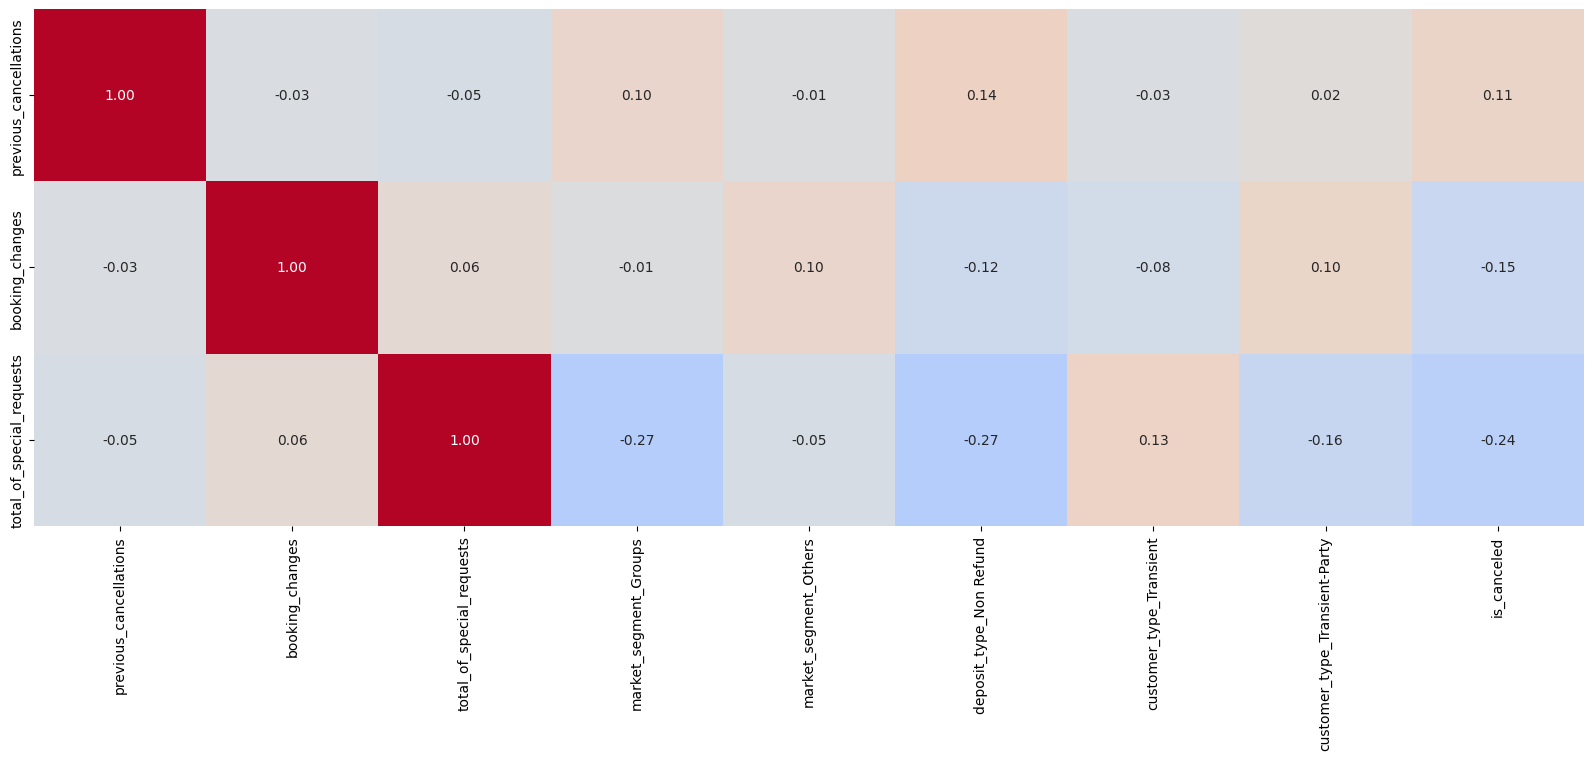

{'corr':                            previous_cancellations  booking_changes  \
 previous_cancellations                   1.000000        -0.027499   
 booking_changes                         -0.027499         1.000000   
 total_of_special_requests               -0.048064         0.056346   
 
                            total_of_special_requests  market_segment_Groups  \
 previous_cancellations                     -0.048064               0.098612   
 booking_changes                             0.056346              -0.008698   
 total_of_special_requests                   1.000000              -0.269502   
 
                            market_segment_Others  deposit_type_Non Refund  \
 previous_cancellations                 -0.010583                 0.140984   
 booking_changes                         0.095530                -0.120059   
 total_of_special_requests              -0.048195                -0.266641   
 
                            customer_type_Transient  \
 previous_cance

In [70]:
import dython as dy
from dython.nominal import associations
associations(df_enc3, figsize=(20,10), cbar=False,cmap='coolwarm', nom_nom_assoc='theil', display_rows=['previous_cancellations',
                                                                                    'booking_changes',
                                                                                    'total_of_special_requests'])

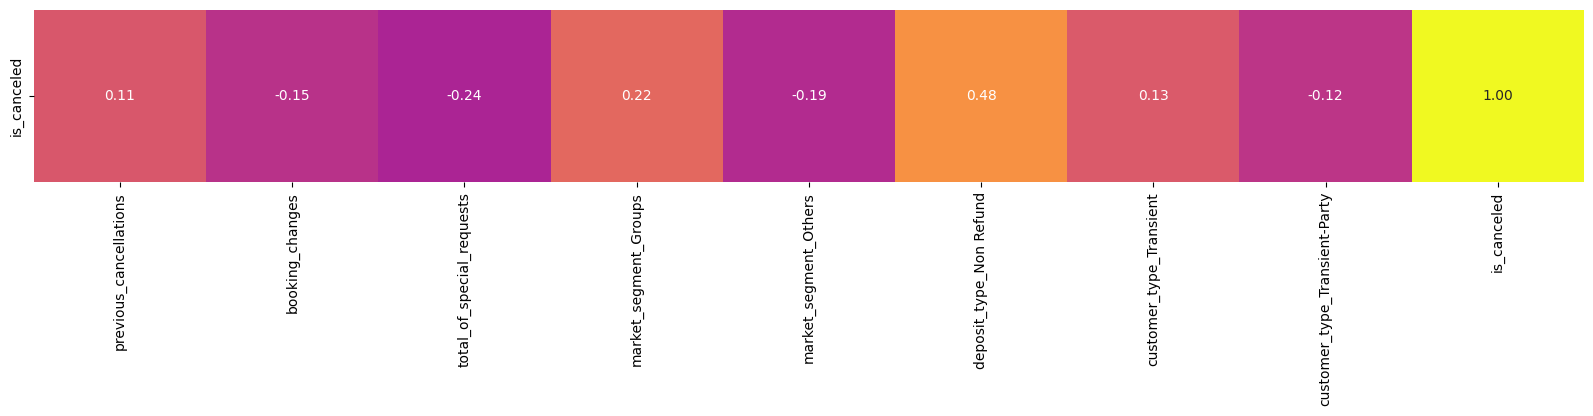

{'corr':              previous_cancellations  booking_changes  \
 is_canceled                0.109699        -0.146336   
 
              total_of_special_requests  market_segment_Groups  \
 is_canceled                  -0.235677               0.224072   
 
              market_segment_Others  deposit_type_Non Refund  \
 is_canceled              -0.187998                 0.480605   
 
              customer_type_Transient  customer_type_Transient-Party  \
 is_canceled                 0.129576                      -0.119984   
 
              is_canceled  
 is_canceled          1.0  ,
 'ax': <Axes: >}

In [71]:
associations(df_enc3, figsize=(20,10),cmap='plasma', cbar=False, nom_nom_assoc='theil', display_rows=['is_canceled'])

Kita dapat mengkonfirmasi dan menemukan informasi yang sejalan dengan VIF, bawah pada heatmap di atas menunjukkan tidak terdapatnya multicollinearity karena setiap fitur memiliki nilai yang berbeda.